# Weather Data Visualization for Walk-to-Work Prediction
Compatible with project dependencies

In [27]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [28]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from loguru import logger

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install loguru

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install logger


Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [32]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

logger.info("Starting weather data visualization")

2025-10-02 16:21:50.177 | INFO     | __main__:<module>:5 - Starting weather data visualization


In [36]:
# Load your CSV files
# Replace with your actual filename
# Load your CSV files
# Replace with your actual filename
df = pd.read_csv(r'C:\Users\USER\Desktop\새 폴더 (2)\mlops-cloud-project-mlops-7-vforj\weather_hourly.csv')

logger.info(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print("\n=== Dataset Overview ===")
print(df.head())
print(f"\nShape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

2025-10-02 16:24:00.334 | INFO     | __main__:<module>:7 - Dataset loaded: 6788 rows, 48 columns



=== Dataset Overview ===
         Date      Time            TM  STN  WD   WS  GST_WD  GST_WS  GST_TM  \
0  2024-09-21  01:00:00  202409210100   90   2  5.5      -9    -9.0      -9   
1  2024-09-21  01:00:00  202409210100   93  32  1.6      -9    -9.0      -9   
2  2024-09-21  01:00:00  202409210100   95  36  3.7      -9    -9.0      -9   
3  2024-09-21  01:00:00  202409210100   98  36  0.8      -9    -9.0      -9   
4  2024-09-21  01:00:00  202409210100   99   7  3.5      -9    -9.0      -9   

       PA  ...  TE_005  TE_01  TE_02  TE_03  ST_SEA  WH   BF  IR  IX  RN_JUN  
0  1012.3  ...    17.4  -99.0  -99.0  -99.0   -99.0  -9 -9.0  -9   1      -9  
1  1000.8  ...    18.5   20.6   23.6   25.4    26.7  -9 -9.0  -9   4       1  
2   993.1  ...    18.1  -99.0  -99.0  -99.0   -99.0  -9 -9.0  -9   1      -9  
3   995.8  ...    19.0  -99.0  -99.0  -99.0   -99.0  -9 -9.0  -9   1      -9  
4  1006.3  ...    19.7  -99.0  -99.0  -99.0   -99.0  -9 -9.0  -9   1      -9  

[5 rows x 48 columns]

S

In [40]:
# 1. Temperature Distribution
logger.info("Creating temperature distribution plots")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df['temperature'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Temperature (°C)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Temperature Distribution', fontsize=14)
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df['temperature'], vert=True)
axes[1].set_ylabel('Temperature (°C)', fontsize=12)
axes[1].set_title('Temperature Box Plot', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('temp_analysis.png', dpi=300, bbox_inches='tight')
logger.info("Saved: temp_analysis.png")
plt.show()

KeyboardInterrupt: 

In [42]:
# 2. Weather Conditions Over Time
if 'date' in df.columns or 'datetime' in df.columns:
    date_col = 'date' if 'date' in df.columns else 'datetime'
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values(date_col)
    
    logger.info("Creating time series plot")
    fig, ax = plt.subplots(figsize=(14, 6))
    
    ax.plot(df[date_col], df['temperature'], label='Temperature', 
            color='tomato', linewidth=1.5, alpha=0.8)
    
    if 'precipitation' in df.columns:
        ax2 = ax.twinx()
        ax2.bar(df[date_col], df['precipitation'], label='Precipitation', 
                color='steelblue', alpha=0.3, width=0.8)
        ax2.set_ylabel('Precipitation (mm)', fontsize=12)
        ax2.legend(loc='upper right')
    
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Temperature (°C)', fontsize=12)
    ax.set_title('Weather Conditions Over Time', fontsize=14)
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('time_series.png', dpi=300, bbox_inches='tight')
    logger.info("Saved: time_series.png")
    plt.show()

2025-10-02 16:25:56.668 | INFO     | __main__:<module>:2 - Creating correlation heatmap
2025-10-02 16:26:03.438 | INFO     | __main__:<module>:12 - Saved: correlation.png


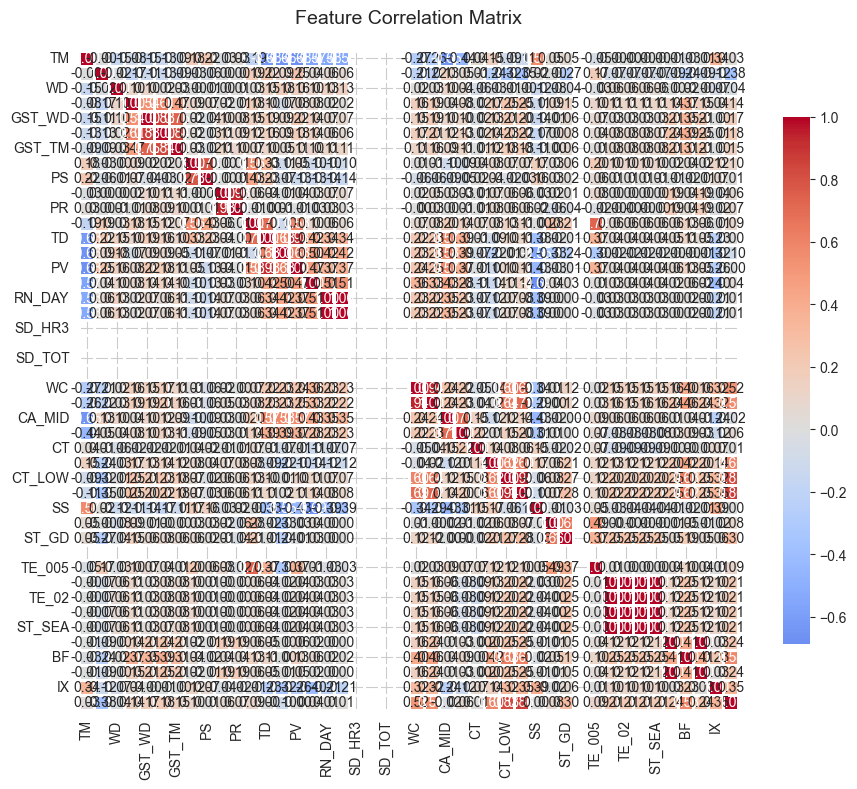

In [43]:
# 3. Correlation Heatmap
logger.info("Creating correlation heatmap")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')
logger.info("Saved: correlation.png")
plt.show()

In [44]:
# 4. Walking Conditions Analysis
if 'good_to_walk' in df.columns or 'target' in df.columns:
    target_col = 'good_to_walk' if 'good_to_walk' in df.columns else 'target'
    logger.info(f"Creating walking conditions analysis (target: {target_col})")
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Temperature by walking condition
    df.boxplot(column='temperature', by=target_col, ax=axes[0, 0])
    axes[0, 0].set_title('Temperature by Walking Condition')
    axes[0, 0].set_xlabel('Good to Walk')
    axes[0, 0].set_ylabel('Temperature (°C)')
    
    # Precipitation by walking condition
    if 'precipitation' in df.columns:
        df.boxplot(column='precipitation', by=target_col, ax=axes[0, 1])
        axes[0, 1].set_title('Precipitation by Walking Condition')
        axes[0, 1].set_xlabel('Good to Walk')
        axes[0, 1].set_ylabel('Precipitation (mm)')
    
    # Wind speed by walking condition
    if 'wind_speed' in df.columns:
        df.boxplot(column='wind_speed', by=target_col, ax=axes[1, 0])
        axes[1, 0].set_title('Wind Speed by Walking Condition')
        axes[1, 0].set_xlabel('Good to Walk')
        axes[1, 0].set_ylabel('Wind Speed (m/s)')
    
    # Class distribution
    class_counts = df[target_col].value_counts()
    axes[1, 1].bar(class_counts.index, class_counts.values, 
                   color=['coral', 'skyblue'])
    axes[1, 1].set_title('Class Distribution')
    axes[1, 1].set_xlabel('Good to Walk')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.suptitle('Walking Condition Analysis', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.savefig('walking_analysis.png', dpi=300, bbox_inches='tight')
    logger.info("Saved: walking_analysis.png")
    plt.show()

In [45]:
# 5. Feature Statistics Summary
logger.info("Generating feature statistics")
print("\n=== Feature Statistics ===")
print(df[numeric_cols].describe())

2025-10-02 16:26:24.386 | INFO     | __main__:<module>:2 - Generating feature statistics



=== Feature Statistics ===
                 TM          STN           WD           WS       GST_WD  \
count  6.788000e+03  6788.000000  6788.000000  6788.000000  6788.000000   
mean   2.024092e+11   198.170890    13.239098     2.318503    -6.451679   
std    8.112147e+03    64.473913    11.906213     2.120007     8.001300   
min    2.024092e+11    90.000000    -9.000000    -9.000000    -9.000000   
25%    2.024092e+11   137.000000     5.000000     1.100000    -9.000000   
50%    2.024092e+11   202.000000     9.000000     2.000000    -9.000000   
75%    2.024092e+11   258.000000    23.000000     3.100000    -9.000000   
max    2.024092e+11   296.000000    36.000000    16.100000    36.000000   

            GST_WS       GST_TM           PA           PS           PT  ...  \
count  6788.000000  6788.000000  6788.000000  6788.000000  6788.000000  ...   
mean     -6.494844   126.652770  1000.334708  1011.992443    -4.909694  ...   
std       6.962515   439.261819    22.429679    18.241421  

2025-10-02 16:26:29.377 | INFO     | __main__:<module>:2 - Creating feature distribution plots
2025-10-02 16:26:49.253 | INFO     | __main__:<module>:24 - Saved: feature_distributions.png


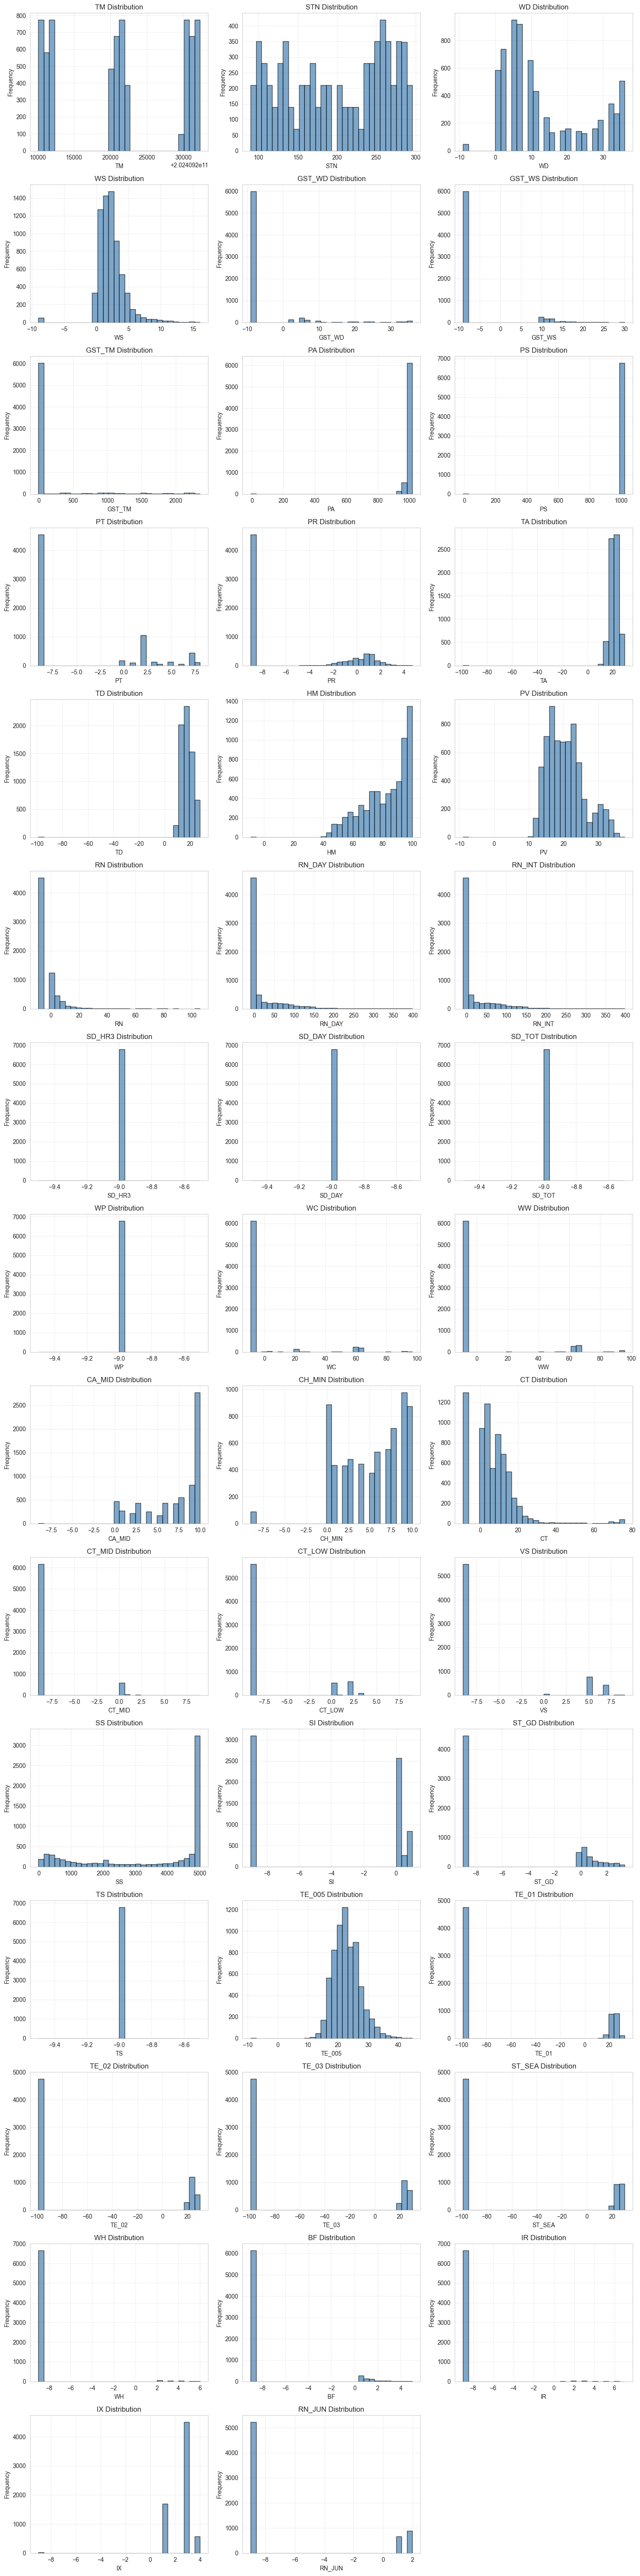

In [46]:
# 6. Additional: Feature distribution plots
logger.info("Creating feature distribution plots")
n_features = len(numeric_cols)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col].dropna(), bins=30, color='steelblue', 
                   edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontsize=12)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
logger.info("Saved: feature_distributions.png")
plt.show()

In [47]:
# Save processed data
output_path = 'processed_weather_data.csv'
df.to_csv(output_path, index=False)
logger.success(f"Processed data saved to: {output_path}")

logger.success("Visualization complete! All images saved.")

2025-10-02 16:27:42.473 | SUCCESS  | __main__:<module>:4 - Processed data saved to: processed_weather_data.csv
2025-10-02 16:27:42.475 | SUCCESS  | __main__:<module>:6 - Visualization complete! All images saved.
